# Парсинг веб страниц

## Введение в HTML
**Общие принципы**  
В прошлой лекции мы видели возможность обращаться к веб-сайтам из скрипта python и получать от них ответ в текстовом виде:

In [ ]:
import requests

response = requests.get("https://google.com")
print(response.text)  

Чаще всего полученный ответ – это HTML-документ.


#### Пример

```
<html>
<head> Заголовок </head>
<body>
    <div> 
        Первый кусок текста со своими свойствами
    </div>
    <div>
        Второй кусок текста
            <b>
                Третий кусок с выделенным текстом
            </b>
    </div>
    Четвёртый кусок текста        
</body>
</html>
```

## 1.2.  Что такое HTML 

**HTML (HyperText Markup Language)**  — это язык разметки. Он является стандартным для написания сайтов. Команды в таком языке называются **тегами**. Если открыть абсолютно любой сайт, нажать на правую кнопку мышки, а после нажать `View page source`, то перед вами предстанет HTML скелет этого сайта. 

Можно увидеть, что HTML-страница это ни что иное, как набор вложенных тегов. Можно заметить, например, следующие теги:

- `<title>` – заголовок страницы
- `<h1>…<h6>` – заголовки разных уровней
- `<p>` – абзац (paragraph)
- `<div>` – выделения фрагмента документа с целью изменения вида содержимого
- `<table>` – прорисовка таблицы 
- `<tr>` – разделитель для строк в таблице 
- `<td>` – разделитель для столбцов в таблице
- `<b>` – устанавливает жирное начертание шрифта

Обычно команда `<...>` открывает тег, а  `</...>` закрывает его. Все, что находится между этими двумя командами, подчиняется правилу, которое диктует тег. Например, все, что находится между `<p>` и  `</p>` — это отдельный абзац.   

Теги образуют своеобразное дерево с корнем в теге `<html>` и разбивают страницу на разные логические кусочки. У каждого тега могут быть свои потомки (дети) — те теги, которые вложены в него, и свои родители. 

Например, HTML-древо страницы может выглядеть вот так:

    <html>
    <head> Заголовок </head>
    <body>
        <div> 
            Первый кусок текста со своими свойствами
        </div>
        <div>
            Второй кусок текста
                <b>
                    Третий кусок с выделенным текстом
                </b>
        </div>
        Четвёртый кусок текста        
    </body>
    </html>            
Можно работать с этим html как с текстом, а можно как с деревом. Обход этого дерева и есть парсинг веб-страницы. Нам нужно находить нужные нам узлы среди всего этого разнообразия и забирать с них информацию.
Вручную обходить эти деревья неудобно, поэтому есть специальные языки для обхода деревьев.
- [CSS-селектор](https://ru.wikibooks.org/wiki/CSS/%D0%A1%D0%B5%D0%BB%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D1%8B) (это когда мы ищем элемент страницы по паре ключ, значение)
- [XPath](https://ru.wikipedia.org/wiki/XPath) (это когда мы прописываем путь по дереву вот так: /html/body/div[1]/div[3]/div/div[2]/div)
- Различные библиотеки, например, BeautifulSoup для питона. Именно эту библиотеку мы и будем использовать. 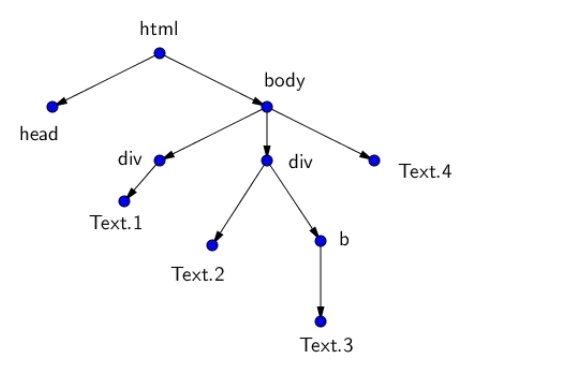

### Таблицы
HTML так же позволяет форматировать табличные данные. Основные теги:
```
<table> — таблица
<tr> — строка таблицы
<th> — заголовочная ячейка (bold + по центру)
<td> — обычная ячейка
```

<table>
  <tr>
    <th>Имя</th>
    <th>Возраст</th>
  </tr>
  <tr>
    <td>Анна</td>
    <td>22</td>
  </tr>
  <tr>
    <td>Олег</td>
    <td>30</td>
  </tr>
</table>


## Парсинг веб-страниц с помощью BeautifulSoup

**Парсинг** — это процесс автоматического извлечения данных с веб-страниц. Например, можно спарсить заголовки новостей, курсы валют, расписание фильмов, цены в интернет-магазине и т.д.
Парсинг часто применяется:  
* в анализе данных;  
* в мониторинге цен и новостей;  
* для сбора контента с публичных источников.  


Пакет **[bs4 , a.k.a BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/)** был назван в честь стиха про красивый суп из Алисы в стране чудес.

BeautifulSoup — это библиотека, которая из необработанного HTML кода страницы создаёт структурированный массив данных, по которому очень удобно искать необходимые теги, классы, атрибуты, тексты и прочие элементы веб страниц.

> Пакет под названием `BeautifulSoup` — скорее всего, не то, что нам нужно. Это третья версия (*Beautiful Soup 3*), а мы будем использовать четвертую. Нужно будет установить пакет `beautifulsoup4`. Чтобы было совсем весело, при импорте нужно указывать другое название пакета — `bs4`, а импортировать функцию под названием `BeautifulSoup`. В общем, сначала легко запутаться, но эти трудности нужно преодолеть.

```
!pip install beautifulsoup4
```

In [ ]:
pip install --upgrade pip

In [ ]:
pip install beautifulsoup4

In [ ]:
#Пример базового парсинга:
import requests
from bs4 import BeautifulSoup

url = 'https://example.com'
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    title = soup.title.text
    print('Заголовок страницы:', title)
else:
    print('Ошибка при запросе:', response.status_code)


#### Основные методы поиска
BeautifulSoup предоставляет несколько удобных методов для поиска элементов:
* find(tag, attrs) — находит первый тег с указанными условиями;


* find_all(tag, attrs) — находит все подходящие теги;


* .text или .get_text() — извлекает текст из тега;


* .get('атрибут') — извлекает значение атрибута, например href.


In [ ]:
from bs4 import BeautifulSoup

In [ ]:
# Создание объекта Beautiful Soup из сырого HTML
html = """
<html>
<body>
  <h1>Заголовок</h1>
  <p>Текст параграфа1</p>
  <p>Текст параграфа2</p>
  <a href="https://example.com">Ссылка</a>
</body>
</html>
"""

soup = BeautifulSoup(html, "html.parser")

# Извлечение заголовка
title = soup.find("h1").text

# Извлечение текста параграфа
paragraph = soup.find("p").text

# Извлечение ссылки
link = soup.find("a").get("href") # или сокращенно link = soup.find("a")["href"]


In [ ]:
link

<a href="https://example.com">Ссылка</a>

In [ ]:
link = soup.find("a")
link.attrs

In [ ]:
link

In [ ]:
paragraph

In [ ]:
title

In [40]:
paragraphs = soup.find_all("p")
paragraphs

[<p>Текст параграфа1</p>, <p>Текст параграфа2</p>]

In [38]:
for item in paragraphs:
    print(item.text)

Текст параграфа1
Текст параграфа2


In [41]:
print(soup.find('a'))                   # Первый <a>
print(soup.find('a').text)              # Текст первого <a>
print(soup.find('a').get('href'))           # Ссылка из первого <a>
print(soup.find('a')['href'])               # Альтернативный способ

<a href="https://example.com">Ссылка</a>
Ссылка
https://example.com
https://example.com


### Задание для закрепления
Подумайте, что будет выведено в результате выполнения следующего скрипта.


In [44]:
import requests
from bs4 import BeautifulSoup

html = requests.get("https://realpython.com").text
soup = BeautifulSoup(html, "html.parser")

links = soup.find_all("a")
for i in links:
    href = i["href"] #i.attrs.get('href')
    if href[:5]=="https":
        print(href)

/
/start-here/
#
/search?kind=article&kind=course&order=newest
/learning-paths/
/quizzes/
/tutorials/all/
/community/
/office-hours/
/podcasts/rpp/
/products/books/
/ref/
/mentor/
/account/join/
#
/learner-stories/
/newsletter/
https://www.pythonjobshq.com
/team/
/write-for-us/
/become-an-instructor/
/search
/search
/account/join/
/account/login/?next=%2F
/how-to-drop-null-values-in-pandas/
/how-to-drop-null-values-in-pandas/
/tutorials/basics/
/tutorials/data-science/
/tutorials/python/
/podcasts/rpp/
/podcasts/rpp/
/tutorials/all/
/learning-paths/
/search?level=basics
/search?level=intermediate
/search?level=advanced
/tutorials/ai/
/tutorials/api/
/tutorials/best-practices/
/tutorials/career/
/tutorials/community/
/tutorials/databases/
/tutorials/data-science/
/tutorials/data-structures/
/tutorials/data-viz/
/tutorials/devops/
/tutorials/django/
/tutorials/docker/
/tutorials/editors/
/tutorials/flask/
/tutorials/front-end/
/tutorials/gamedev/
/tutorials/gui/
/tutorials/machine-learni

### Обработка таблиц
В работе дата-аналитика полезная информация на веб-страницах часто предаставлена в табличной форме. Парсить таблицы тоже можно с помощью BeautifulSoup: 


In [57]:
html = requests.get("https://www.cbr.ru/currency_base/daily/").text
soup = BeautifulSoup(html, "html.parser")

table = soup.find('table')
headers = table.find_all('th')
for h in headers:
    print(h.text.strip(),end='  ')
print()
rows = table.find_all('tr')

for i,row in enumerate(rows):
    if i == 0:
        continue
    cols = row.find_all('td')
    data = [col.text.strip() for col in cols]
    print(data)

Цифр. код  Букв. код  Единиц  Валюта  Курс  
['036', 'AUD', '1', 'Австралийский доллар', '56,1328']
['944', 'AZN', '1', 'Азербайджанский манат', '49,9536']
['012', 'DZD', '100', 'Алжирских динаров', '65,5066']
['051', 'AMD', '100', 'Армянских драмов', '22,2022']
['764', 'THB', '10', 'Батов', '26,7190']
['048', 'BHD', '1', 'Бахрейнский динар', '225,8052']
['933', 'BYN', '1', 'Белорусский рубль', '27,5351']
['975', 'BGN', '1', 'Болгарский лев', '50,9917']
['068', 'BOB', '1', 'Боливиано', '12,2896']
['986', 'BRL', '1', 'Бразильский реал', '15,6464']
['410', 'KRW', '1000', 'Вон', '61,2441']
['344', 'HKD', '1', 'Гонконгский доллар', '10,9223']
['980', 'UAH', '10', 'Гривен', '20,6050']
['208', 'DKK', '1', 'Датская крона', '13,3576']
['784', 'AED', '1', 'Дирхам ОАЭ', '23,1235']
['840', 'USD', '1', 'Доллар США', '84,9211']
['704', 'VND', '10000', 'Донгов', '33,6708']
['978', 'EUR', '1', 'Евро', '99,8246']
['818', 'EGP', '10', 'Египетских фунтов', '17,6403']
['985', 'PLN', '1', 'Злотый', '23,32

In [49]:
rows = table.find_all('tr')
rows

[<tr>
 <th>Цифр. код</th>
 <th>Букв. код</th>
 <th>Единиц</th>
 <th>Валюта</th>
 <th>Курс</th>
 </tr>,
 <tr>
 <td>036</td>
 <td>AUD</td>
 <td>1</td>
 <td>Австралийский доллар</td>
 <td>56,1328</td>
 </tr>,
 <tr>
 <td>944</td>
 <td>AZN</td>
 <td>1</td>
 <td>Азербайджанский манат</td>
 <td>49,9536</td>
 </tr>,
 <tr>
 <td>012</td>
 <td>DZD</td>
 <td>100</td>
 <td>Алжирских динаров</td>
 <td>65,5066</td>
 </tr>,
 <tr>
 <td>051</td>
 <td>AMD</td>
 <td>100</td>
 <td>Армянских драмов</td>
 <td>22,2022</td>
 </tr>,
 <tr>
 <td>764</td>
 <td>THB</td>
 <td>10</td>
 <td>Батов</td>
 <td>26,7190</td>
 </tr>,
 <tr>
 <td>048</td>
 <td>BHD</td>
 <td>1</td>
 <td>Бахрейнский динар</td>
 <td>225,8052</td>
 </tr>,
 <tr>
 <td>933</td>
 <td>BYN</td>
 <td>1</td>
 <td>Белорусский рубль</td>
 <td>27,5351</td>
 </tr>,
 <tr>
 <td>975</td>
 <td>BGN</td>
 <td>1</td>
 <td>Болгарский лев</td>
 <td>50,9917</td>
 </tr>,
 <tr>
 <td>068</td>
 <td>BOB</td>
 <td>1</td>
 <td>Боливиано</td>
 <td>12,2896</td>
 </tr>,
 <tr>
 <

#### ПРимеры

##### Пример 1
Изучите страницу https://the-internet.herokuapp.com/tables. Посмотрите HTML-код этой страницы (средствами браузера или python). C помощью Beautiful Soup можно извлечь данные первой таблицы в отдельные списки для каждой строки:


In [58]:
url = "https://the-internet.herokuapp.com/tables"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Находим первую таблицу
    table = soup.find("table", id="table1")
    
    # Извлекаем заголовки
    headers = [th.text.strip() for th in table.find_all("th")]
    print("Заголовки:", headers)
    
    # Извлекаем строки данных
    rows = table.find_all("tr")[1:]  # Пропускаем заголовок
    for row in rows:
        cols = [td.text.strip() for td in row.find_all("td")]
        print(cols)
else:
    print("Ошибка запроса:", response.status_code)


Заголовки: ['Last Name', 'First Name', 'Email', 'Due', 'Web Site', 'Action']
['Smith', 'John', 'jsmith@gmail.com', '$50.00', 'http://www.jsmith.com', 'edit\ndelete']
['Bach', 'Frank', 'fbach@yahoo.com', '$51.00', 'http://www.frank.com', 'edit\ndelete']
['Doe', 'Jason', 'jdoe@hotmail.com', '$100.00', 'http://www.jdoe.com', 'edit\ndelete']
['Conway', 'Tim', 'tconway@earthlink.net', '$50.00', 'http://www.timconway.com', 'edit\ndelete']


##### Пример 2
Однако для дальнейшей обработки табличные данные удобнее иметь в форме списка словарей. Это делается немного сложнее:


In [60]:
table = soup.find("table", id="table2")
    
headers = [th.text.strip() for th in table.find_all("th")]
    
# Парсинг в словари
data = []
rows = table.find_all("tr")[1:]  # Пропускаем строку заголовков
for row in rows:
    cols = [td.text.strip() for td in row.find_all("td")]
    row_dict = dict(zip(headers, cols))
    data.append(row_dict)
    
# Вывод результата
# for entry in data:
#     print(entry)

data

[{'Last Name': 'Smith',
  'First Name': 'John',
  'Email': 'jsmith@gmail.com',
  'Due': '$50.00',
  'Web Site': 'http://www.jsmith.com',
  'Action': 'edit\ndelete'},
 {'Last Name': 'Bach',
  'First Name': 'Frank',
  'Email': 'fbach@yahoo.com',
  'Due': '$51.00',
  'Web Site': 'http://www.frank.com',
  'Action': 'edit\ndelete'},
 {'Last Name': 'Doe',
  'First Name': 'Jason',
  'Email': 'jdoe@hotmail.com',
  'Due': '$100.00',
  'Web Site': 'http://www.jdoe.com',
  'Action': 'edit\ndelete'},
 {'Last Name': 'Conway',
  'First Name': 'Tim',
  'Email': 'tconway@earthlink.net',
  'Due': '$50.00',
  'Web Site': 'http://www.timconway.com',
  'Action': 'edit\ndelete'}]

# Практическая работа  
1.**Парсинг заголовков**  
Получите список всех заголовков (от `<h1>` до `<h6>`) со страницы https://contextures.com/xlsampledata01.html.  
Пример вывода:    
```
h1: Excel Sample Data for Practice
h2: 1) Get  Sample Data for Practice
h2: 2) About the Sample Data

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://contextures.com/xlsampledata01.html"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    headings = []

    for level in range(1, 7):
        tags = soup.find_all(f"h{level}")
        for tag in tags:
            headings.append((f"h{level}", tag.get_text(strip=True)))

    for tag, text in headings:
        print(f"{tag}: {text}")
else:
    print("Страница недоступна:", response.status_code)


2. **Парсинг таблицы**  
Извлеките в список словарей таблицу из пункта 3.1 на странице https://contextures.com/xlsampledata01.html. Вычислите среднюю стоимость товаров и суммарную выручку.


In [ ]:
import requests, statistics
from bs4 import BeautifulSoup

url = "https://contextures.com/xlsampledata01.html"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    
    # На странице много таблиц. Нас интересует третья
    tables = soup.find_all("table")
    table = tables[2]

    rows = table.find_all("tr")
    
    # Получаем заголовки
    headers = [td.get_text(strip=True) for td in rows[0].find_all("td")]
    
    # Получаем строки таблицы и записываем их значения в разные списки
    columns = {key: [] for key in headers}
    for row in rows[1:]:
        cells = row.find_all("td")
        for header, cell in zip(headers, cells):
            if header in ["Units", "UnitCost", "Total"]:
                columns[header].append(float(cell.text.strip()))
            else:
                columns[header].append(cell.text.strip())

    # Вывод результатов
    print(f"Средняя цена товара: {statistics.mean(columns["UnitCost"])}")
    print(f"Суммарная выручка: {sum(columns["Total"])}")

else:
    print("Не удалось загрузить страницу:", response.status_code)